# Introduction to Machine Learning

Machine learning is closely related to statistical modeling in the sense that they both use data to predict outcomes of unknown processes.  Statistical modeling focuses on understanding how the data is generated while machine learning focuses on algorithms that can be trained with fewer assumptions on the distribution and statistical properties on the data. We give the models tunable parameters that can be adapted to observed data; the program is "learning" from the data.

### Categories of Machine Learning
1. *Supervised learning*: Data is labeled and the algorithms learn to predict the output(responses) from the input data. 
    - classification: when the output is a category, such as "disease" and "no disease"
    - regression: when the output is continuous, such as "length"
2. *Unsupervised Learning*: Data is unlabeled and the algorithms learn to inherent structure from the input data
    - clustering: want to find inherent groupings in data, e.g., grouping customers by buying behavior
    - dimensionality reduction: search for more succinct representations of data

![Supervised_Unsupervised](https://www.mathworks.com/help/stats/machinelearning_supervisedunsupervised.png)
(Picture from https://www.mathworks.com/help/stats/machine-learning-in-matlab.html)

### Scikit-Learn 
One of the best known machine learning libraries for Python is [Scikit-Learn](http://scikit-learn.org/stable/). Scikit-Learn has a clean and uniform API as well as very complete online documentation.  Some other (less-popular?) machine learning libraries include [mlpy](http://mlpy.sourceforge.net/) and [PyBrain](http://pybrain.org/). And there are massive projects such as [Keras](https://keras.io/) and [TensorFlow](https://opensource.google/projects/tensorflow) and [PyTorch](https://pytorch.org/) which are recommended for larger projects once you have some understanding especially of neural networks.  Here we will work with Scikit-Learn only.

Let's explicitly import modules from the library that we need:

In [1]:
from sklearn import datasets
from sklearn import model_selection 
from sklearn import linear_model


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling

In [3]:
#to check version of scikit-learn
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


### Common terminology:
 - **Cross-validation** is a technique of dividing the data into *training data* (used to train the algorithm) and *testing data* (used to test/validate the trained algorithm). The goal is to measure how well the model predicts new input, and to limit problems of [overfitting](https://en.wikipedia.org/wiki/Overfitting). See flowchart [here](https://scikit-learn.org/stable/modules/cross_validation.html).  One popular technique is k-fold cross-validation with k-group of datasets.  See an example [here](https://en.wikipedia.org/wiki/Cross-validation_\(statistics\)). 

 - **Feature extraction** involves creating suitable feature variables and the corresponding feature matrices that can be passed to a machine learning algorithm. The module `sklearn.feature_extraction` has methods that automatically assemble feature matrices (similar to `Patsy` formula library in statistical models). 
 
 - **Dimensionality reduction** and **feature selection** eliminate less useful features and therefore reduce the dimensionality of the problem. This is important when the number of features is larger than or comparable to the number of observations. The modules `sklearn.decomposition` and `sklearn.feature_selection` contain method for reducing the dimensionality. One technique is principle component analysis (PCA) which computes the singular value decomposition of the feature matrix and keeps only most important singular vectors. 

We will work with built-in datasets in `Scikit-Learn`. The `datasets` module in `sklearn` has 3 groups of functions for:
1. loading built-in datasets:  with prefix `load_`, e.g., `load_boston`
2. fetching external datasets: with prefix `fetch_`, e.g., `fetch_califonia_housing`
3. generating random datasets from random numbers: with prefix `make_`, e.g., `make_regression`

## Regression
Consider a problem with 50 samples and 50 features out of which only 10 features are informative:

In [4]:
# set random seed so that we get the same random numbers
np.random.seed(123)
# generate random dataset 
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10, noise=0.5)

In [5]:
X_all.shape

(50, 50)

In [6]:
y_all.shape

(50,)

In [7]:
print(y_all)
#print(X_all)

[-229.83661547  161.62403228  140.53127975    7.22350445 -131.11661616
   55.96489373  -40.12922552   89.08488003  125.20797375   87.67189682
  -94.10159438 -118.38613297  -59.1241068    91.88015034 -136.40348634
   12.80387964   88.28163943  -71.55994508  128.54374612  126.36924716
   65.08316488 -133.05798324  -69.54439659   23.52100028 -175.23842124
  134.87869964   43.95712464 -165.61046084 -210.45191093  112.79179656
  -43.32878753  127.60648911   65.41896407  -90.37780327  -24.39491127
  226.96571321  176.32374598   65.10110484  -96.13809835   66.26100248
  -34.64255333  166.2932245   -74.74544629   19.82242856  -19.22722579
 -109.33538757  115.5186741  -192.69682799  -34.59693118   16.32025776]


In [8]:
# Split the dataset into 2 equal size datasets: a training set and a testing set
X_train, X_test, y_train, y_test = \
   model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [9]:
X_train.shape, y_train.shape

((25, 50), (25,))

#### (1) Ordinary Least Squares:  
minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation 
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [10]:
# Create an instance of ordinary linear regression model in sklearn.linear_model module
model = linear_model.LinearRegression()
# Fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

Note that our regression problem has 50 features but only 25 samples were used to train the model. So we expect overfiting. Let's quantify this in a few ways:
1) Compute the sum of squared errors (SSE):

In [11]:
# define function to compute SSE
def sse(resid):
    return np.sum(resid**2)

In [12]:
# compute SSE for our training dataset
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

6.959046915933887e-25

In [13]:
# compute SSE for our test dataset
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

125559.82650748454

2) Compute the r-squared score using the `score` method:

In [14]:
model.score(X_train, y_train)

1.0

In [15]:
model.score(X_test, y_test)

0.6168735974258979

3) Plot the residuals of training and testing datasets and look at the values of coefficients computed by the residual.  We can extract the fitted parameters by the `coef_` attribute of a `LinearRegression` object.

In [16]:
# Create a function for plotting the residuals and coefficients 
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

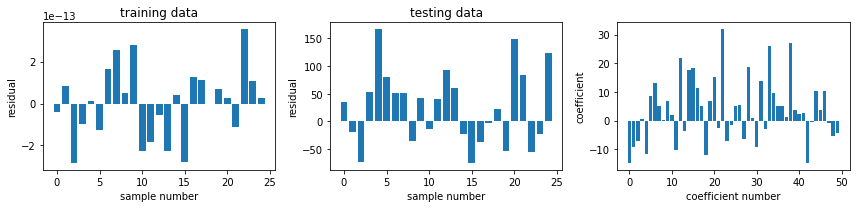

In [17]:
# Call the function 
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

# note the scale on the residual axis for the training data plot

The reason why we have overfitting in this example is that there are too few samples. A solution could be to get more samples but this is not always practical (e.g. too expensive to collect more data).  

* This is related to the ill-conditioning problem we saw in the numerical section of class when trying to fit data with high-order polynomials.  The matrices became nearly singular and the resulting fit was prone to oscillating between the fitting points and was also very sensitive to noise.
* Making an ill-conditioned problem better behaved is call *regularization*.

### Regularized regression
Let 
* $X$ be the feature matrix (i.e, independent variables), 
* $y$ be the response variables (i.e., the observed values), and 
* $\beta$ the vector of model parameters.

Ordinary linear regression varies the model parameters ($\beta$) to minimize the sum of the squares of the errors 
- $~\min_{\beta} \| X\beta - y \|_2^2  $

But this is prone to overfitting especially if there is too little data.  Symptom of overfitting are large parameter values, or parameters that are expected to be unimportant having larger than exepected values.  Thus, regularization adds a penalty term that favors smaller values of the parameters. 
* [Regularized regression](https://en.wikipedia.org/wiki/Regularized_least_squares):  $~~~~~~\min_{\beta} \|X\beta - y \|_2^2 + \textit{penalty term}  $ 
* By using a larger penalty term we can more heavily favor smaller values of the parameters at the expense of potentially making the fit worse.

We will examine two forms
* [LASSO regression](https://en.wikipedia.org/wiki/Lasso_(statistics)):    $~~~~~\min_{\beta} \{ \|X\beta - y \|_2^2 + \alpha \| \beta \|_1 \} $  favors a parameter vector with as few nonzero elements as possible  
*[Ridge regression](https://en.wikipedia.org/wiki/Regularized_least_squares#Ridge_regression_(or_Tikhonov_regularization)):    $~~~~~~~\min_{\beta} \{ \|X\beta - y \|_2^2 + \alpha \| \beta \|_2^2 \} $ favors parameters with smaller coefficients

Here $\alpha$ is the strength of the regularization (free parameter).

[Vector norm](https://en.wikipedia.org/wiki/Norm_(mathematics)) reminder
* 2-norm or Euclidean norm --- $\|x\|_2 = \sum_{i=1}^{N} x_i^2$
* 1-norm or Manhattan norm --- $\|x\|_1 = \sum_{i=1}^{N} |x_i|$


Note: 
* Use [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) regression when you wish to eliminate as many features as possible. 
* Use [Ridge](https://en.wikipedia.org/wiki/Regularized_least_squares#Ridge_regression_(or_Tikhonov_regularization)) regression when you want to limit the magnitude of coefficients.

Also, the two models treat outliers differently
* Ridge squares the residual which means it much more heavily penalizes outliers with residual $>1$ compared with LASSO --- so the values of the coefficients fitted by Ridge are impacted more by outliers.
* LASSO does not square the residual so even residuals $<1$ might still contribute to the penalty --- so the values of the coefficients fitted by LASSO might be more evenly impacted even by points with smaller residual.


More details [here](http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) and [here](https://www.stat.cmu.edu/~ryantibs/datamining/lectures/16-modr1.pdf).

#### (2a) Ridge regression:  impose a penalty on the size of coefficients  
 [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) for Ridge

In [ ]:
# Perform Ridge regression with alpha = 2.5 
model = linear_model.Ridge(alpha=2.5)
model.fit(X_train, y_train)

In [ ]:
# compute SSE for our training dataset
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train


In [ ]:
# compute SSE for our test dataset
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test


In [ ]:
# compute model score
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
# plot the residuals and coefficients 
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)


Note that the errors on the training data become *much* larger (because we introduced the penalty term), but the error on the testing data did not change much and similarly the size of the coefficients did not change much either.
* Repeat with a larger penalty term to force the coefficients to become smaller

For this example the 2-norm penalty term (ridge regression) does not help much because of the way we generated the data --- we know that there should only be 10 explantory variables so rather than trying to make all of the coefficients small we want to try to concentrate the model into as few terms as possible.  
* Other data sets can show different behaviors.

#### (2b) LASSO regression:  eliminate as many features as possible
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) for LASSO

In [ ]:
# Perform LASSO regression with alpha = 1.0
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

In [ ]:
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train


In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test


In [ ]:
# compute model score
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

The coefficients from LASSO regression are mostly zeros. This agrees with our data because when we generated data, we set that only 10 features are informative.  Therefore, if you suspect that many features might not be important in the model, the L1 regularization of LASSO regression is a good method to try.

#### (3)  A systematic way of choosing $\alpha$ 
The most suitable $\alpha$ is problem dependent. 
First, let's look at how the model coefficients and the SSE depends on $\alpha$ for this specific problem.

In [ ]:
alphas = np.logspace(-4, 2, 100)  #100 numbers (from 10^(-4) to 10^2) spaced evenly on a log scale
coeffs = np.zeros((len(alphas), X_train.shape[1])) # size = 100x50
sse_train = np.zeros_like(alphas)  #note: np.zeros_like returns an array of zeros with the same shape and type as a given array
sse_test = np.zeros_like(alphas)
# loop through the alpha values and perform LASSO regression for each alpha
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    resid = y_train - model.predict(X_train)
    sse_train[n] = sum(resid**2)
    resid = y_test - model.predict(X_test)
    sse_test[n] = sum(resid**2)

In [ ]:
#plot the coefficients and SSE 
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
fig.tight_layout()

*Note:*
- Left plot: When $\alpha$ is very small, many coefficients are nonzero. When $\alpha$ is increased above a certain value, many of the coefficients collapse to 0 while only a few remain nonzero. 
- Right plot: While the SSE for the training dataset is steadily increasing, the SSE of the testing dataset has a sharp drop when $\log_{10} \alpha$ is around -2 to -1 and then slowly increases. When $\alpha$ is too large ($\log_{10} \alpha > 1$), both SSEs are very large.

It is *very tempting* to just do what we just did --- adjust $\alpha$ to give the best error on our test data set but this is **very wrong**.  
* We just fitted our test data!
* So how can we now test the quality of the fit? You cannot!

$\alpha$ is an example of a hyperparameter
* You can think of it as a knob that you can adjust to control the behavior of the underlying model that has parameters $\beta$ obtained by fitting the training data.
* But how to optimize $\alpha$ if we cannot use our test data?

Scikit-learn can automatically perform a search for the optimal $\alpha$ with the `LassoCV` and `RidgeCV` classes. This involves a [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) method ($k$-fold cross-validation: $k=3$ by default now or use the `cv` argument).

Follow the link and read about CV and why it helps especially with small data sets.

In [ ]:
# Perform Lasso method with automatically choosen alpha
model = linear_model.LassoCV(cv=3)
model.fit(X_all, y_all)

In [ ]:
# we can get the alpha selected by the `.alpha_` attribute
model.alpha_

In [ ]:
# Compute the SSE of the training set 
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train


In [ ]:
# Compute the SSE of the test set 
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test


In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
# Plot the residual and the SSE
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

#### (4) A combination of  LASSO and Ridge regressions (elastic net regression)
The objective function is
$$
     \min_{\beta} \{ \|X\beta - y \|_2^2 + \alpha \rho \| \beta \|_1 + \alpha (1 - \rho) \| \beta \|_2^2 \} 
$$
where $\rho$ determines the relative weight of the L1 and L2 penalties. In Scikit-learn, we use the [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html?highlight=elasticnetcv#sklearn.linear_model.ElasticNetCV) class with `l1_ratio` as the $\rho$ parameter.

In [ ]:

# NOTE: here we use rho = 1/2 (default)

In [ ]:
model = linear_model.ElasticNetCV(cv=3,l1_ratio=0.5)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.alpha_

In [ ]:
model.l1_ratio_

In [ ]:

resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

In [ ]:
resid_test = y_test - model.predict(X_test)
sse_test = sum(resid_test**2)
sse_test

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)


Notes: recall that we used $\rho$ = 1/2 so we expected to see the characteristics of both LASSO(making coefficients 0) and Ridge (suppressing the size of the coefficients)

## References: 
- *Numerical Python: A Practical Techniques Approach for Industry*  by Robert Johansson (Chapter 15)
- *Python Data Science Handbook* by Jake VanderPlas
- https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/